In [70]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras
from keras.models import *
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import keras
from keras.models import load_model
from keras.models import Sequential
import cv2


In [2]:
#CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [3]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [4]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [5]:
# dense 
model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [6]:

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [7]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


In [8]:
img = load_img('data/train/cats/cat453a.jpg') # this is a PIL image
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
print(x.shape)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='data/preview', save_prefix='cat', save_format='jpeg'):
  i += 1
  if i > 20:
    break # otherwise the generator would loop indefinitely

(242, 242, 3)
(1, 242, 242, 3)


In [9]:
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [10]:
batch_size = 16
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [11]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
'data/train', # this is the target directory
classes = ["cats","dogs"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size,
class_mode='binary') # since we use binary_crossentropy loss, we need binary labels

Found 200 images belonging to 2 classes.


In [13]:
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'data/validation',
classes = ["cats","dogs"],
target_size=(150, 150),
batch_size=batch_size,
class_mode='binary')

Found 31 images belonging to 2 classes.


In [14]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1}

In [15]:
history = model.fit_generator(
train_generator,
#steps_per_epoch= 2 , # // batch_size,
epochs=25,
validation_data=validation_generator,
#validation_steps= 2 
) # // batch_size)
model.save('first_model.h5') # always save your weights after training or during training

/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
13/13 [==============================] - 22s 1s/step - loss: 1.0788 - accuracy: 0.4647 - val_loss: 0.7141 - val_accuracy: 0.3871
Epoch 2/25
13/13 [==============================] - 16s 1s/step - loss: 0.6605 - accuracy: 0.6638 - val_loss: 0.6476 - val_accuracy: 0.6452
Epoch 3/25
13/13 [==============================] - 16s 1s/step - loss: 0.5927 - accuracy: 0.7158 - val_loss: 0.6170 - val_accuracy: 0.6774
Epoch 4/25
13/13 [==============================] - 16s 1s/step - loss: 0.5801 - accuracy: 0.6718 - val_loss: 0.5736 - val_accuracy: 0.7097
Epoch 5/25
13/13 [==============================] - 16s 1s/step - loss: 0.4978 - accuracy: 0.7499 - val_loss: 0.5511 - val_accuracy: 0.7097
Epoch 6/25
13/13 [==============================] - 16s 1s/step - loss: 0.4207 - accuracy: 0.8058 - val_loss: 0.4923 - val_accuracy: 0.7742
Epoch 7/25
13/13 [==============================] - 16s 1s/step - loss: 0.4578 - accuracy: 0.8275 - val_loss: 0.5873 - val_accuracy: 0.6774
Epoch 8/25
13/13 [==

In [16]:

model = load_model('first_model.h5')

In [17]:
loss, accuracy = model.evaluate(train_generator, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9650
Testing Accuracy:  0.6774


In [18]:

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


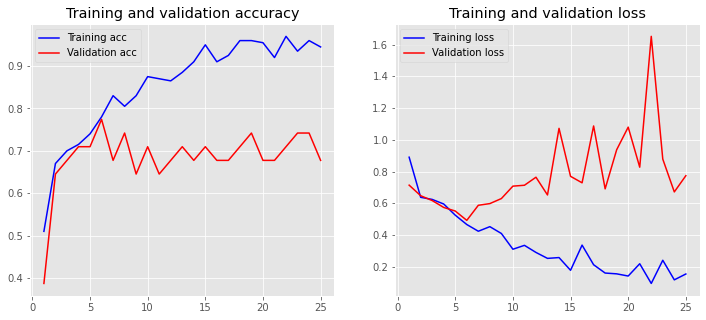

In [20]:
plot_history(history)

/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[1]]


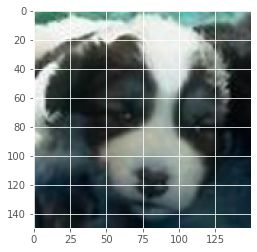

In [21]:

#model = Sequential()

#model =load_model('first_try.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('Image/DogHead/dog000001c.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)

[[0]]


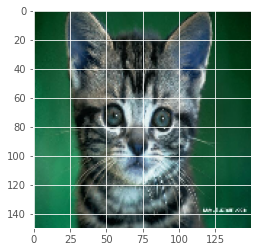

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('Image/CatHead/cat000908.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)

[[0]]


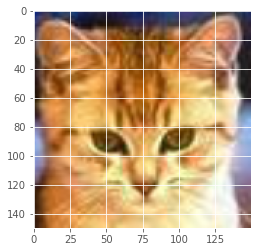

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('Image/CatHead/cat751a.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)

[[1]]


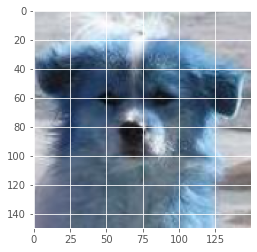

In [24]:

#model = Sequential()

#model =load_model('first_try.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('Image/DogHead/dog000043a.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)


### multiple classes

In [25]:
#CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [26]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [27]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [28]:
# dense 
model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [29]:

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [30]:

datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


In [31]:
img = load_img('data/train/cats/cat453a.jpg') # this is a PIL image
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
print(x.shape)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='data/preview', save_prefix='cat', save_format='jpeg'):
  i += 1
  if i > 20:
    break # otherwise the generator would loop indefinitely

(242, 242, 3)
(1, 242, 242, 3)


In [32]:
model.compile(loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [33]:
batch_size = 16
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [34]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
'data/train', # this is the target directory
classes = ["cats","dogs", "rabbits"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size,
class_mode='categorical') 

Found 300 images belonging to 3 classes.


In [36]:
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'data/validation',
classes = ["cats","dogs", "rabbits"],
target_size=(150, 150),
batch_size=batch_size,
class_mode='categorical')

Found 43 images belonging to 3 classes.


In [37]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1, 'rabbits': 2}

In [39]:
history = model.fit_generator(
train_generator,
#steps_per_epoch= 2 , # // batch_size,
epochs=25,
validation_data=validation_generator,
#validation_steps= 2 
) # // batch_size)
model.save('second_model.h5') # always save your weights after training or during training

Epoch 1/25
19/19 [==============================] - 33s 2s/step - loss: 1.1018 - accuracy: 0.6511 - val_loss: 1.1013 - val_accuracy: 0.6667
Epoch 2/25
19/19 [==============================] - 32s 2s/step - loss: 1.1006 - accuracy: 0.6622 - val_loss: 1.0983 - val_accuracy: 0.6667
Epoch 3/25
19/19 [==============================] - 37s 2s/step - loss: 1.0956 - accuracy: 0.6633 - val_loss: 1.0597 - val_accuracy: 0.6667
Epoch 4/25
19/19 [==============================] - 27s 1s/step - loss: 1.0357 - accuracy: 0.6722 - val_loss: 1.1349 - val_accuracy: 0.6822
Epoch 5/25
19/19 [==============================] - 30s 2s/step - loss: 0.9894 - accuracy: 0.6967 - val_loss: 1.2597 - val_accuracy: 0.6357
Epoch 6/25
19/19 [==============================] - 39s 2s/step - loss: 0.9681 - accuracy: 0.7067 - val_loss: 0.9308 - val_accuracy: 0.7364
Epoch 7/25
19/19 [==============================] - 26s 1s/step - loss: 0.8737 - accuracy: 0.7389 - val_loss: 0.8819 - val_accuracy: 0.7364
Epoch 8/25
19/19 [==

In [40]:
loss, accuracy = model.evaluate(train_generator, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9633
Testing Accuracy:  0.8527


In [41]:

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [42]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


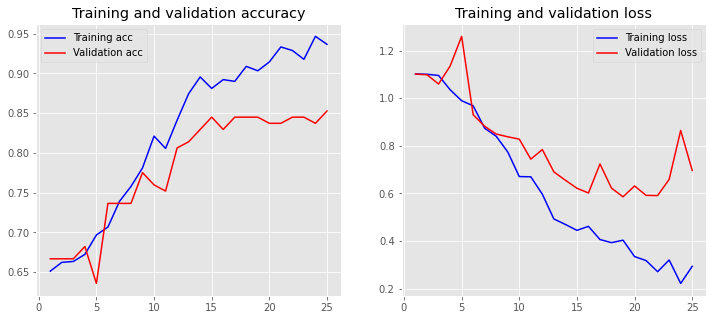

In [43]:
plot_history(history)

/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0]


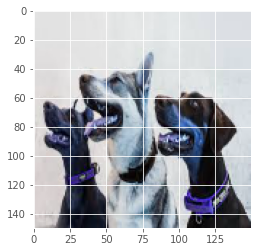

In [44]:

#model = Sequential()

#model =load_model('first_try.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('dog.jpeg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)

[2]


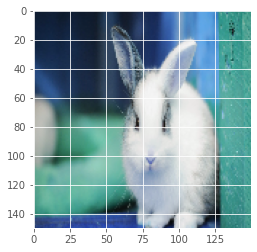

In [45]:
model.compile(loss='catigorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('rabbit-475261_0.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)

[0]


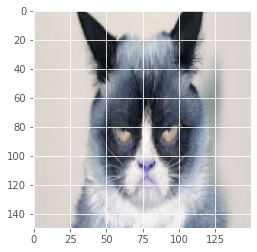

In [46]:
model.compile(loss='catigorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('cat.jpeg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)

### Grid Search

In [47]:
def create_model(num_filters,num_filters1, kernel_size, dropout, optimizer):
    model = Sequential()
    model.add(Conv2D(num_filters, kernel_size, input_shape=(150, 150, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters1, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters1, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
    metrics=['accuracy'])
    return model

In [48]:
param_grid = dict(num_filters=[16,32,64],
                  num_filters1= [64], 
                  kernel_size=[(3, 3)],
                  dropout = [0.3, 0.5],
                  optimizer =['RMSprop','Adam']
                 )

In [49]:

X_train, y_train = next(iter(train_generator))
X_test, y_test = next(iter(validation_generator))

In [50]:




epochs = 25

model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=100,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)
print('accuracy_test = ',test_accuracy)

print('best socre = ', grid_result.best_score_)
print('best param = ',grid_result.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


accuracy_test =  0.4375
best socre =  0.25
best param =  {'optimizer': 'Adam', 'num_filters1': 64, 'num_filters': 32, 'kernel_size': (3, 3), 'dropout': 0.3}


In [51]:
model1 = create_model(optimizer= 'Adam', num_filters1= 64, num_filters= 32, kernel_size = (3, 3), dropout = 0.3)

In [52]:
history = model1.fit_generator(
        train_generator,
        epochs=8,
        validation_data=validation_generator,
    ) 

/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
19/19 [==============================] - 37s 2s/step - loss: 1.0904 - accuracy: 0.3713 - val_loss: 0.9855 - val_accuracy: 0.5116
Epoch 2/8
19/19 [==============================] - 32s 2s/step - loss: 0.9657 - accuracy: 0.5219 - val_loss: 0.9603 - val_accuracy: 0.5349
Epoch 3/8
19/19 [==============================] - 32s 2s/step - loss: 0.8291 - accuracy: 0.6622 - val_loss: 0.9023 - val_accuracy: 0.6047
Epoch 4/8
19/19 [==============================] - 30s 2s/step - loss: 0.6991 - accuracy: 0.7223 - val_loss: 0.8870 - val_accuracy: 0.6047
Epoch 5/8
19/19 [==============================] - 30s 2s/step - loss: 0.6020 - accuracy: 0.7754 - val_loss: 0.7869 - val_accuracy: 0.6744
Epoch 6/8
19/19 [==============================] - 30s 2s/step - loss: 0.4775 - accuracy: 0.8390 - val_loss: 0.8838 - val_accuracy: 0.6279
Epoch 7/8
19/19 [==============================] - 30s 2s/step - loss: 0.4583 - accuracy: 0.8305 - val_loss: 0.7232 - val_accuracy: 0.6744
Epoch 8/8
19/19 [==========

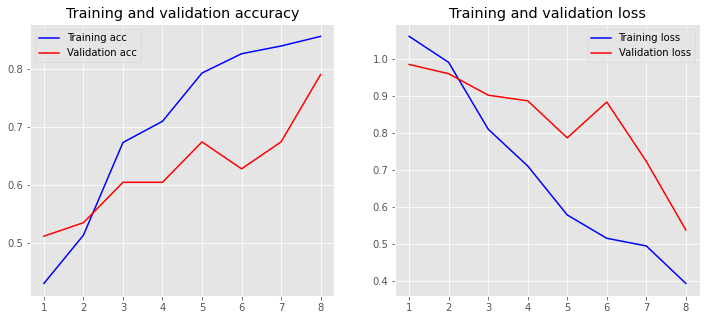

In [53]:
plot_history(history)

In [56]:
filenames = validation_generator.filenames
nb_samples = len(filenames)
nb_samples

43

In [57]:


#Confution Matrix and Classification Report
Y_pred = model1.predict_generator(validation_generator, nb_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['cat', 'dog', 'rabbit']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 2  7  3]
 [ 6 10  3]
 [ 4  5  3]]
Classification Report
              precision    recall  f1-score   support

         cat       0.17      0.17      0.17        12
         dog       0.45      0.53      0.49        19
      rabbit       0.33      0.25      0.29        12

    accuracy                           0.35        43
   macro avg       0.32      0.31      0.31        43
weighted avg       0.34      0.35      0.34        43



In [58]:
print(validation_generator.class_indices)
labels = {v : k for k , v in train_generator.class_indices.items()}
print(labels)

{'cats': 0, 'dogs': 1, 'rabbits': 2}
{0: 'cats', 1: 'dogs', 2: 'rabbits'}


In [59]:
def predict_label(img, model):
    img = cv2.imread(img)
    img = cv2.resize(img,(150,150))
    img = np.reshape(img,[1,150,150,3])
    classes = model.predict_classes(img)
    return labels[classes[0]]

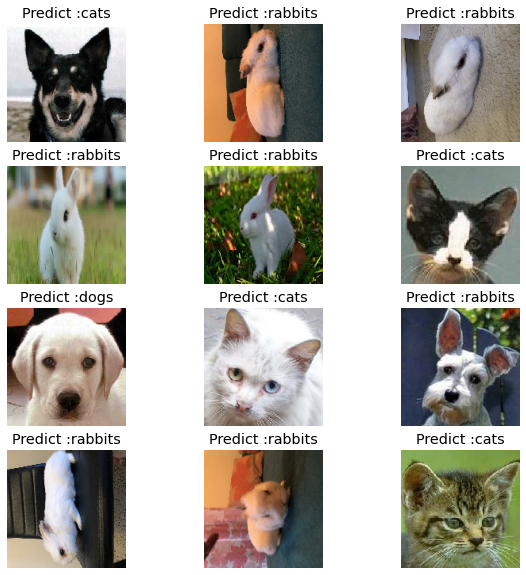

In [67]:


# Get list of animal in the folder

plt.figure(figsize=(10, 10))
for i, image in enumerate(list_animal):
    ax = plt.subplot(4, 3, i +1)
    path =  "TestAnimal/" + image
    
    y_pred = predict_label(path, model1)   
    img1 = load_img(path, target_size=(150, 150))
    plt.imshow(img1)
    label = "Predict :" + y_pred
    plt.title(label)
    plt.axis("off")


In [69]:
#Augmentation of data


classes = ["cats","dogs","rabbits"]
for j in classes:
    monRepertoire = "data/train/"+j
    for file in os.listdir(monRepertoire):
        chemin = os.path.join(monRepertoire, file)
        #print(file)
        img = load_img(chemin) # this is a PIL image
        x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
        x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)
        #print(x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir='data/preview/'+j, save_prefix=j.lower(), save_format='jpeg'):
            i += 1
            if i > 5:
                break
print("end")

(1, 419, 419, 3)


FileNotFoundError: [Errno 2] No such file or directory: 'data/preview/cats/cats_0_4603.jpeg'